# *AIB_03 / SECTION 1 / PROJECT*
---
## ‚ùì Îã§Ïùå Î∂ÑÍ∏∞Ïóê Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÏÑ§Í≥ÑÌï¥Ïïº Ìï†Íπå



# > Î™©Ï∞® 
1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(EDA)
3. Í≤∞Î°†



In [ ]:
# ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞
from google.colab import files
myfile = files.upload()

Saving vgames2.csv to vgames2.csv


In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
import io
df_raw = pd.read_csv(io.BytesIO(myfile["vgames2.csv"]))
df_raw.drop(columns=["Unnamed: 0"], inplace=True)  # "Unnamed: 0" Ïª¨Îüº ÏÇ≠Ï†ú

#1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- ÏûÖÎ†•Í∞íÏù¥ ÏóÜÎäî Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÑ Ìñâ(row) Ï≤òÎ¶¨
> - Ïó∞ÎèÑ(Year)ÏôÄ Ïû•Î•¥(Genre) - -> Í≤∞Ï∏°ÏπòÎ•º Í∞ÄÏßÑ Ìñâ(row) Ï†úÍ±∞
> - Ï†úÏûëÌöåÏÇ¨(Publisher) - - - - - - > Í≤∞Ï∏°ÏπòÎ•º Í∞ÄÏßÑ Ìñâ(row) Ïú†ÏßÄ

- Ïó∞ÎèÑ Îã®ÏúÑ ÌÜµÏùº (yyyy)
> - 1 - - - - - -> 2001
> - 98 - - - - -> 1998
> - 1985 - - -> 1985
> - 2011 - - -> 2011

- Ï∂úÍ≥†Îüâ Îã®ÏúÑ ÌÜµÏùº
> - 100K - - - - > 100 * 10^3 - - - -> 100000
> - 10M - - - - -> 10 * 10^6 - - - - -> 10000000
> - 1000000 - - - - - - - - - - - - - - - -> 1000000


In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Îç∞Ïù¥ÌÑ∞ type & Í≤∞Ï∏°Ïπò ÌôïÏù∏
df_raw.info()
print("\n")

# Í≤åÏûÑ Ìä∏Î†åÎìú Î∂ÑÏÑùÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî "Year", "Genre" Ïª¨ÎüºÏóêÏÑúÎßå
# Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî row ÏÇ≠Ï†ú 
df = df_raw.dropna(subset=["Year", "Genre"])
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher  

In [ ]:
# "Year" Ïª¨ÎüºÏùò Í∞íÏùÑ yyyyÌòïÌÉúÎ°ú ÌÜµÏùº Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ intÎ°ú Î≥ÄÍ≤Ω
def change_y(i) :
  if i < 22 :  
    return i + 2000
  if 22 < i < 100 :
    return i + 1900
  else :
    return i

df["Year"] = df["Year"].apply(change_y).astype(int)
df["Year"].unique() # Í≤∞Í≥º ÌôïÏù∏

In [ ]:
# "~_Sales" Ïª¨ÎüºÏùò "K", "M" Ï†úÍ±∞ & scal ÌÜµÏùº & Îç∞Ïù¥ÌÑ∞ÌÉÄÏûÖ floatÏúºÎ°ú Î≥ÄÍ≤Ω
def unified_sales(i) : 
  if "K" in i : 
    i = i[:len(i)-1]
    return float(i) * 10**3
  if "M" in i :
    i = i[:len(i)-1]
    return float(i) * 10**6
  else :
    return float(i) * 10**6

# Ìï®Ïàò Ï†ÅÏö©
locals = ["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"]
for column_name in locals :
  df[column_name] = df[column_name].apply(unified_sales)

In [ ]:
# Ï§ëÎ≥µÍ∞í ÌôïÏù∏
df.duplicated().value_counts()

False    16277
dtype: int64

#2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù(EDA)
- Total_Sales (ÏßÄÏó≠Î≥Ñ Ï∂úÍ≥†ÎüâÏùò Ìï©) Ìï≠Î™© Ï∂îÍ∞Ä
- Ïó∞ÎèÑÎ≥Ñ Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨

In [ ]:
# Í∞Å ÏßÄÏó≠Ïùò SalesÏùò Ìï©ÏùÑ Î≥¥Ïó¨Ï£ºÎäî "Total_Sales" Ïª¨Îüº ÏÉùÏÑ±
df["Total_Sales"] = df["NA_Sales"] + df["EU_Sales"] + df["JP_Sales"] + df["Other_Sales"]

# "Year"Ïª¨Îüº Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨ & index reset
df.sort_values(by=["Year"], inplace=True)
df.reset_index(drop=True, inplace=True)

- Î≥∏ Îç∞Ïù¥ÌÑ∞Ïùò Platform featureÏóêÎäî PC, PlayStaion, XBox, Wii Îì±Ïù¥ Ï°¥Ïû¨ÌïúÎã§.
- Î≥∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏΩòÏÜîÍ≤åÏûÑ Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. 

In [ ]:
# Î≥ÄÏàò ÏÑ†Ïñ∏
locals = ["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales"]
sales = ["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales", "Total_Sales"]
years = df["Year"].unique()
platforms = ['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
             'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
             'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
             '3DO', 'GG', 'PCFX']
genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
          'Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']

#2-1. Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãú Í≤åÏûÑ Ïàò & ÏßÄÏó≠Î≥Ñ Ï∂úÍ≥†Îüâ Î≥ÄÌôî

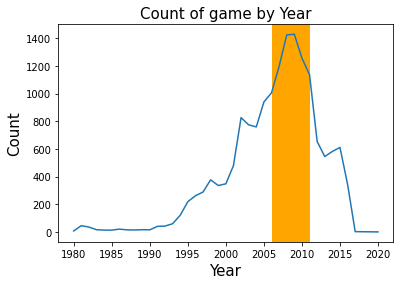

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãú Í≤åÏûÑÏùò ÏàòÎüâ Î≥ÄÌôî ÏãúÍ∞ÅÌôî
game_counts = df.groupby("Year")["Name"].count()

plt.plot(game_counts.index, game_counts)
plt.title("Count of game by Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.axvspan(2006, 2011, facecolor='orange')
plt.show()

- Ïó∞ÎèÑÎ≥Ñ Ï∂úÏãú Í≤åÏûÑÏùò ÏàòÎüâ Î≥ÄÌôî 
>- Ï∂úÏãúÎêú Í≤åÏûÑÏù¥ ÎßéÏùÄ Ïó∞ÎèÑÎäî 2006ÎÖÑ~2011ÎÖÑÏúºÎ°ú Ïó∞Í∞Ñ 1000Í∞ú Ïù¥ÏÉÅÏùò Í≤åÏûÑÏù¥ Ï∂úÏãúÎêòÏóàÎã§.
>- 2008ÎÖÑ Ïù¥ÌõÑÎ°ú Î∂ÄÌÑ∞ ÌòÑÏû¨ÍπåÏßÄ Ï∂úÏãú Í≤åÏûÑÏùò ÏàòÎüâÏùÄ Í∞êÏÜåÌïòÎäî Ï∂îÏÑ∏Î•º Î≥¥Ïù∏Îã§.

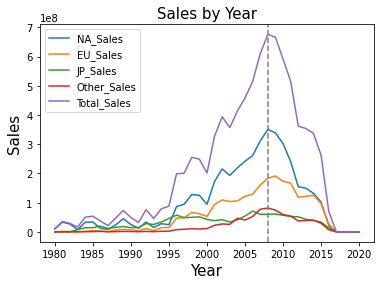

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ Ï∂úÍ≥†Îüâ Î≥ÄÌôî ÏãúÍ∞ÅÌôî
game_sales = df.groupby("Year")[sales].sum()

for i in sales : 
  plt.plot(game_sales.index, game_sales[i])

plt.title("Sales by Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.axvline(x=2008, linestyle="--", color="gray")
plt.legend(sales)
plt.show()

- Ïó∞ÎèÑÎ≥Ñ Ï∂úÍ≥†ÎüâÏùò Î≥ÄÌôî
>- Ï†Ñ ÏßÄÏó≠Ïùò ÏΩòÏÜîÍ≤åÏûÑ Ï∂úÍ≥†Îüâ Ìï©Ïù¥ ÏµúÎåÄÏù∏ Ïó∞ÎèÑÎäî 2008ÎÖÑ Ïù¥Îã§.
>- 2008ÎÖÑÏóê Ï†ÑÏ≤¥ Ï∂úÍ≥†ÎüâÏùò Ï†àÎ∞ò Ï†ïÎèÑÎ•º Î∂ÅÎØ∏ ÏßÄÏó≠Ïù¥ Ï∞®ÏßÄÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
>- 2008ÎÖÑ Ïù¥ÌõÑÎ°ú Ï∂úÍ≥†ÎüâÏù¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞êÏÜåÌïòÎäî Ï∂îÏÑ∏Î•º Î≥¥Ïù∏Îã§.
##### Ïù¥Îäî 'Ïä§ÎßàÌä∏Ìè∞ ÎåÄÏ§ëÌôî' Ïóê Îî∞Î•∏ ÌòÑÏÉÅÏúºÎ°ú ÏòàÏÉÅÎêúÎã§. 

---
###‚ùì  Îã§Ïùå Î∂ÑÍ∏∞Ïóê Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÏÑ§Í≥ÑÌï¥Ïïº Ìï†Íπå
### Í≤åÏûÑ Ïû•Î•¥ / Ï∂úÏãú ÏßÄÏó≠ / ÌîåÎû´Ìèº
---

#2-2. Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑ Ìä∏Î†åÎìú Î∂ÑÏÑù

>- 2008ÎÖÑÎèÑ ~ 2020ÎÖÑÎèÑ
>- Í≤åÏûÑÏùò Ï∂úÍ≥†Îüâ

In [ ]:
df[(df["Year"]>=2008)].index

Int64Index([ 8295,  8296,  8297,  8298,  8299,  8300,  8301,  8302,  8303,
             8304,
            ...
            16267, 16268, 16269, 16270, 16271, 16272, 16273, 16274, 16275,
            16276],
           dtype='int64', length=7982)

In [ ]:
# 2008~2020ÎÖÑÎèÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_2008 = df[8295:]

#(1) ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ Ïû•Î•¥

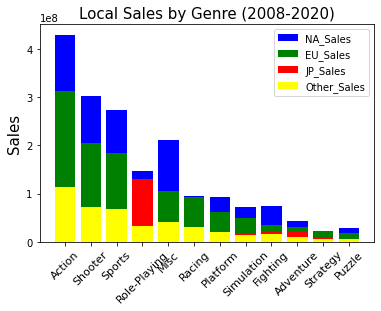

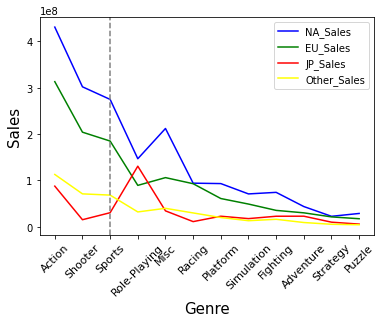

In [82]:
# Ïû•Î•¥Î≥Ñ ÏßÄÏó≠ Ï∂úÍ≥†Îüâ ÏãúÍ∞ÅÌôî
genre_sales = df_2008.groupby("Genre")[sales].sum()
genre_sales.sort_values(by="Total_Sales", inplace=True, ascending=False)
colors = {"NA_Sales" : 'blue', "EU_Sales": 'green', "JP_Sales" : 'red', "Other_Sales" : 'yellow'}

# bar plot
genre_sales2 = genre_sales.reset_index()

for i in locals :
  plt.bar(genre_sales2["Genre"], genre_sales2[i], label=i, color=colors[i])

plt.title("Local Sales by Genre (2008-2020)", fontsize=15)
plt.xticks(rotation =45, fontsize=11)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.show()

# line plot
for i in locals :
  plt.plot(genre_sales.index, genre_sales[i], label=i, color=colors[i])

plt.xticks(rotation =45, fontsize=11)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.axvline(x="Sports", linestyle="--", color="gray")
plt.show()


- Ïû•Î•¥Î≥Ñ ÏßÄÏó≠ Ï∂úÍ≥†Îüâ
>- ÏùºÎ≥∏ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† ÏßÄÏó≠ÏóêÏÑú ÏÑ†Ìò∏ÎèÑÍ∞Ä ÎÜíÏùÄ Í≤åÏûÑ Ïû•Î•¥Îäî Action, Shooter, Sports ÏàúÏÑúÎ°ú ÎèôÏùºÌïòÎã§.
>- ÏùºÎ≥∏ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÎèÑÍ∞Ä ÎÜíÏùÄ Í≤åÏûÑ Ïû•Î•¥Îäî Role-Playing Ïù¥Îã§.
>- ÏùºÎ≥∏ÏùÑ Ï†úÏô∏ÌïòÍ≥† Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏÑ†Ìò∏ÌïòÎäî Ïû•Î•¥Îäî Îß§Ïö∞ Ïú†ÏÇ¨Ìïú Ìå®ÌÑ¥ÏùÑ Í∞ÄÏßÄÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.

## >> ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ Ïû•Î•¥Îäî ÎπÑÏä∑ÌïúÍ∞Ä? 
##(Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï)

>- Í∑ÄÎ¨¥Í∞ÄÏÑ§1 : ÏÑ†Ìò∏ Ïû•Î•¥Îäî ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§. 

In [72]:
from scipy.stats import chi2_contingency
chi1 = chi2_contingency(genre_sales, correction = False)
print("Í∑ÄÎ¨¥Í∞ÄÏÑ§1\n")

if 0 <= chi1[1] <0.05 :
  print("chi2__value :", chi1[0], "\np_value :", chi1[1], "\nÏÑ†Ìò∏ Ïû•Î•¥Îäî ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥Í∞Ä ÏûàÎã§.")
if 0.1 <= chi1[1] :
  print("chi2__value :", chi1[0], "\np_value :", chi1[1], "\nÏÑ†Ìò∏ Ïû•Î•¥Îäî ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§. ")

Í∑ÄÎ¨¥Í∞ÄÏÑ§1

chi2__value : 311278144.372897 
p_value : 0.0 
ÏÑ†Ìò∏ Ïû•Î•¥Îäî ÏßÄÏó≠Î≥Ñ Ï∞®Ïù¥Í∞Ä ÏûàÎã§.


>- Í∑ÄÎ¨¥Í∞ÄÏÑ§2 : Î∂ÅÎØ∏ÏôÄ Ïú†ÎüΩÏùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.


In [73]:
chi2 = chi2_contingency(genre_sales[locals[:2]], correction = False)
print("Í∑ÄÎ¨¥Í∞ÄÏÑ§2\n")

if 0 <= chi2[1] <0.05 :
  print("chi2__value :", chi2[0], "\np_value :", chi2[1], "\nÎ∂ÅÎØ∏ÏôÄ Ïú†ÎüΩÏùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§")
if 0.1 <= chi2[1] :
  print("chi2__value :", chi2[0], "\np_value :", chi2[1], "\nÎ∂ÅÎØ∏ÏôÄ Ïú†ÎüΩÏùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

Í∑ÄÎ¨¥Í∞ÄÏÑ§2

chi2__value : 19134145.10944388 
p_value : 0.0 
Î∂ÅÎØ∏ÏôÄ Ïú†ÎüΩÏùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§


>- Í∑ÄÎ¨¥Í∞ÄÏÑ§3 : Î∂ÅÎØ∏ÏôÄ ÏùºÎ≥∏Ïùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.

In [77]:
chi3 = chi2_contingency(genre_sales.loc[:,["NA_Sales", "JP_Sales"]], correction = False)
print("Í∑ÄÎ¨¥Í∞ÄÏÑ§3\n")

if 0 <= chi3[1] <0.05 :
  print("chi2__value :", chi3[0], "\np_value :", chi3[1], "\nÎ∂ÅÎØ∏ÏôÄ ÏùºÎ≥∏Ïùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.")
if 0.1 <= chi3[1] :
  print("chi2__value :", chi3[0], "\np_value :", chi3[1], "\nÎ∂ÅÎØ∏ÏôÄ ÏùºÎ≥∏Ïùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

Í∑ÄÎ¨¥Í∞ÄÏÑ§3

chi2__value : 226937466.79911363 
p_value : 0.0 
Î∂ÅÎØ∏ÏôÄ ÏùºÎ≥∏Ïùò ÏÑ†Ìò∏ Ïû•Î•¥Îäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.


##>> Í≤∞Í≥º
- ÏãúÍ∞ÅÌôî ÏûêÎ£åÏóêÏÑúÎäî ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ Ïû•Î•¥(ÏùºÎ≥∏ Ï†úÏô∏)Îäî Îß§Ïö∞ Ïú†ÏÇ¨Ìïú Ìå®ÌÑ¥ÏùÑ Î≥¥ÏòÄÎã§.
- Î™®Îì† ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ Ïû•Î•¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÍ≤å Ï∞®Ïù¥Í∞Ä ÏûàÎäî Í≤ÉÏúºÎ°ú  ÌôïÏù∏ÎêòÏóàÎã§.
>- Ï∂úÏãúÌï† ÏßÄÏó≠Ïóê Îî∞Îùº Ïñ¥Îñ§ Ïû•Î•¥Ïùò Í≤åÏûÑÏùÑ ÎßåÎì§ Í≤ÉÏù∏Í∞Ä?
>- Ïû•Î•¥Ïóê Îî∞Îùº Ïñ¥Îñ§ ÏßÄÏó≠ÏóêÏÑú Í≤åÏûÑÏùÑ Ï∂úÏãúÌï† Í≤ÉÏù∏Í∞Ä?

#(2) ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ ÌîåÎû´Ìèº

In [ ]:
# ÌîåÎû´ÌèºÎ≥Ñ("Total_Sales" Í∏∞Ï§Ä ÏÉÅÏúÑ 10ÏúÑ) ÏßÄÏó≠ Ï∂úÍ≥†Îüâ ÏãúÍ∞ÅÌôî 
platform_sales = df_2008.groupby("Platform").sum()
platform_sales.sort_values(by="Total_Sales", inplace=True, ascending=False)

platform_sales.index[:10]

Index(['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'PC', 'XOne', 'PSP', 'PS2'], dtype='object', name='Platform')

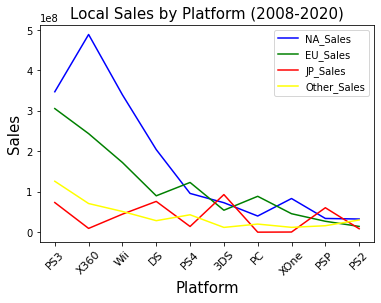

In [ ]:
# line plot
for i in locals :
  plt.plot(platform_sales.index[:10], platform_sales.loc[:'PS2', i], label=i, color=colors[i])

plt.title("Local Sales by Platform (2008-2020)", fontsize=15)
plt.xticks(rotation =45, fontsize=11)
plt.xlabel("Platform", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.show()

- ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ ÌîåÎû´Ìèº
>- ÏßÄÏó≠ÎßàÎã§ Îã§Î•∏ Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù∏Îã§.

>   - ÏßÄÏó≠Î≥Ñ ÏÑ†Ìò∏ÌïòÎäî ÌîåÎû´Ìèº
>      - Î∂ÅÎØ∏ : X360
>      - Ïú†ÎüΩ : PS3
>      - ÏùºÎ≥∏ : 3DS
>      - Í∏∞ÌÉÄ : PS3

#(3) Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥Ïùò Ï∂úÍ≥†Îüâ Î≥ÄÌôî

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥Î≥Ñ "Total_Sales" dataframe ÏÉùÏÑ±
genre_years = pd.DataFrame({"Year":df_2008["Year"]})
for i in genres : 
  genre_years = genre_years.merge(pd.DataFrame({i:df_2008[(df_2008["Genre"]==i)]
                                                .groupby("Year").sum()["Total_Sales"]}), 
                                  how="outer", on="Year")
# Ï§ëÎ≥µÍ∞í ÏÇ≠Ï†ú
genre_years.drop_duplicates(inplace=True)

# Í≤∞Ï∏°Ïπò = 0
genre_years.fillna(0, inplace=True)

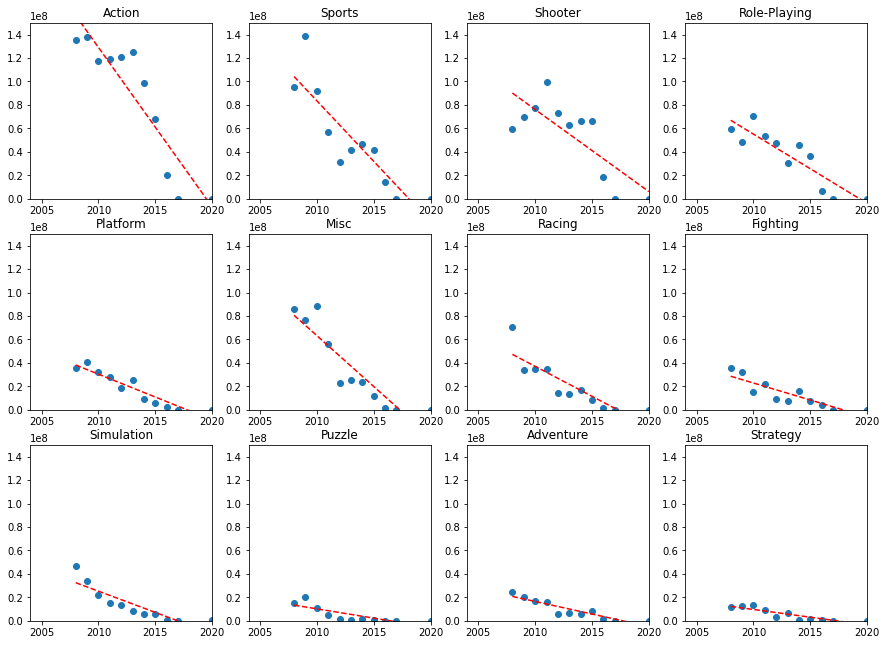

In [ ]:
# ÏãúÍ∞ÅÌôî
fig, axs = plt.subplots(3, 4, figsize=(15, 11))

for i in range(len(genres)) :  
  if i <= 3: #axsÏùò row ÏÑ§Ï†ï
    r = 0
  elif i > 3 and i <= 7 :
      r = 1
  elif i > 7 and i <= 11 :
      r = 2
  c = i%4  #axsÏùòcolumn ÏÑ§Ï†ï

  x = genre_years["Year"]
  y = genre_years[genres[i]]
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)

  axs[r, c].scatter(x, y)
  axs[r, c].set_title(genres[i])
  axs[r, c].set_ylim(0,150000000)
  axs[r, c].set_xlim(2004, 2020)
  axs[r, c].plot(x,p(x),"r--") # Ï∂îÏÑ∏ÏÑ† Í∑∏Î¶¨Í∏∞
plt.show()

- Ïó∞ÎèÑÎ≥Ñ Ïû•Î•¥Ïùò Ï∂úÍ≥†Îüâ Î≥ÄÌôî
>- Î™®Îì† Í≤åÏûÑ Ïû•Î•¥ÏóêÏÑú ÏãúÍ∞ÑÏóê ÏßÄÎÇ®Ïóê Îî∞Îùº Ï∂úÍ≥†ÎüâÏù¥ Ï§ÑÏñ¥Îì†Îã§.
>- Í∞ÄÏû• Í∞ÄÌååÎ•¥Í≤å Í∞êÏÜå Ï∂îÏÑ∏Î•º Î≥¥Ïù¥Îäî Ïû•Î•¥Îäî ActionÏù¥Îã§.



#(4) Ïó∞ÎèÑÎ≥Ñ ÌîåÎû´ÌèºÏóê Îî∞Î•∏ Ï∂úÍ≥†Îüâ Î≥ÄÌôî

In [ ]:
df_2008["Platform"].unique()

array(['X360', 'DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS2', 'XB', 'DC', '3DS',
       'PSV', 'WiiU', 'PS4', 'XOne'], dtype=object)

In [ ]:
# ÌîåÎû´ÌèºÎ≥Ñ Ï∂úÍ≥†Îüâ Î≥ÄÌôî
platform_years = pd.DataFrame({"Year":df_2008["Year"]})
list_p = df_2008["Platform"].unique()

for i in list_p : 
  platform_years = platform_years.merge(pd.DataFrame({i:df_2008[(df_2008["Platform"]==i)]
                                                      .groupby("Year").sum()["Total_Sales"]}), 
                                        how="outer", on="Year")
# Ï§ëÎ≥µÍ∞í ÏÇ≠Ï†ú
platform_years.drop_duplicates(inplace=True)

# Í≤∞Ï∏°Ïπò = 0
platform_years.fillna(0, inplace=True)

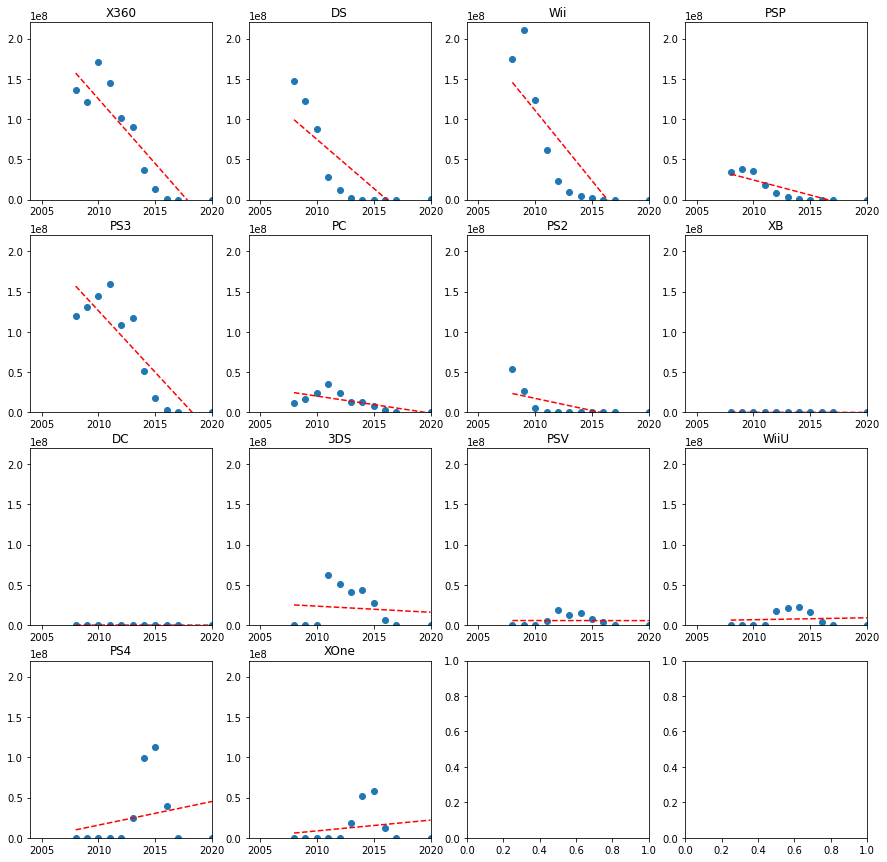

In [ ]:
# ÏãúÍ∞ÅÌôî
fig, axs = plt.subplots(4, 4, figsize=(15, 15))

for i in range(len(list_p)) :  
  if i <= 3: #axsÏùò row ÏÑ§Ï†ï
    r = 0
  elif i > 3 and i <= 7 :
      r = 1
  elif i > 7 and i <= 11 :
      r = 2
  elif i > 11 and i <= 15 :
      r = 3
  c = i%4  #axsÏùòcolumn ÏÑ§Ï†ï

  x = platform_years["Year"]
  y = platform_years[list_p[i]]
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)

  axs[r, c].scatter(x, y)
  axs[r, c].set_title(list_p[i])
  axs[r, c].set_ylim(0,220000000)
  axs[r, c].set_xlim(2004, 2020)
  axs[r, c].plot(x,p(x),"r--") # Ï∂îÏÑ∏ÏÑ† Í∑∏Î¶¨Í∏∞
plt.show()

- ÌîåÎû´ÌèºÎ≥Ñ Ï∂úÍ≥†Îüâ Î≥ÄÌôî
>- ÏãúÍ∞ÑÏóê ÏßÄÎÇ®Ïóê Îî∞Îùº Ï∂úÍ≥†ÎüâÏù¥ Ï§ÑÏñ¥ÎìúÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù∏Îã§. (ÏùºÎ∂Ä ÌîåÎû´Ìèº Ï†úÏô∏)
>- Í∞ÄÏû• Í∞ÄÌååÎ•¥Í≤å Í∞êÏÜå Ï∂îÏÑ∏Î•º Î≥¥Ïù¥Îäî ÌîåÎû´ÌèºÏùÄ X360Í≥º PS3Ïù¥Îã§.

#(5) Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑ Î∂ÑÏÑù

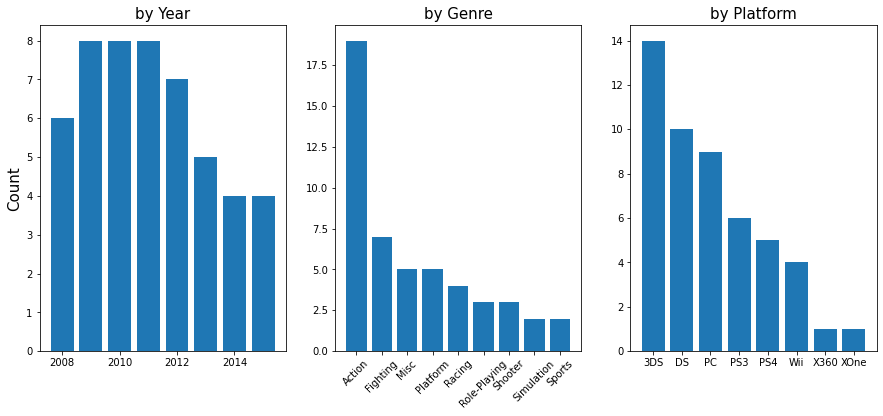

In [ ]:
# "Total_Sales" Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑ (ÏÉÅÏúÑ 50Í∞ú)
sales_T = df_2008.sort_values(by="Total_Sales", ascending=False)[:50]
sales_T_G = sales_T.groupby("Genre")["Name"].count()
sales_T_P = sales_T.groupby("Platform")["Name"].count()
sales_T_Y = sales_T.groupby("Year")["Name"].count()

# ÏãúÍ∞ÅÌôî : Ïó∞ÎèÑ, Ïû•Î•¥, ÌîåÎû´Ìèº
fig, (axs1,axs2, axs3) = plt.subplots(1, 3, figsize=(15, 6))

axs1.bar(sales_T_Y.index, sales_T_Y.to_numpy()) 
axs1.set_title("by Year", fontsize=15)
axs1.set_ylabel("Count", fontsize=15)

axs2.bar(sales_T_G.index, sales_T_G.sort_values(ascending=False)) 
axs2.set_title("by Genre", fontsize=15)
axs2.tick_params(axis='x', rotation=45)

axs3.bar(sales_T_P.index, sales_T_P.sort_values(ascending=False)) 
axs3.set_title("by Platform", fontsize=15)

plt.show()

- ÏßÄÏó≠Î≥Ñ Ï∂úÍ≥†Îüâ Ìï©Ïù¥ ÎÜíÏùÄ Í≤åÏûÑ (ÏÉÅÏúÑ 50Í∞ú)
>- Action Ïû•Î•¥ÏóêÏÑú Í∞ÄÏû• ÎßéÎã§.
>- 3DS ÌîåÎû´ÌèºÏóêÏÑú Í∞ÄÏû• ÎßéÎã§.

In [78]:
# ÏßÄÏó≠Î≥Ñ Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑ (ÏÉÅÏúÑ 10Í∞ú)
sales_NA = df_2008.sort_values(by="NA_Sales", ascending=False)[:10]
sales_EU = df_2008.sort_values(by="EU_Sales", ascending=False)[:10]
sales_JP = df_2008.sort_values(by="JP_Sales", ascending=False)[:10]
sales_OH = df_2008.sort_values(by="Other_Sales", ascending=False)[:10]

sales_A = pd.concat([sales_NA, sales_EU, sales_JP, sales_OH])
sales_A.drop_duplicates(inplace=True)
sales_A.shape

(28, 10)

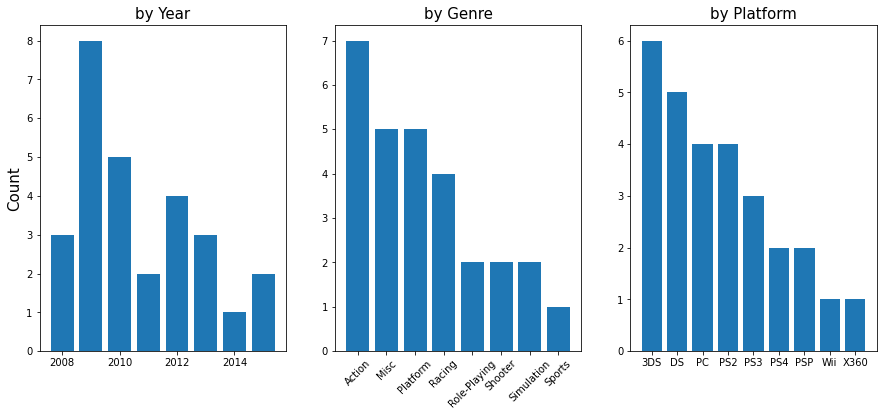

In [ ]:
sales_A_G = sales_A.groupby("Genre")["Name"].count()
sales_A_P = sales_A.groupby("Platform")["Name"].count()
sales_A_Y = sales_A.groupby("Year")["Name"].count()

# ÏãúÍ∞ÅÌôî : Ïó∞ÎèÑ, Ïû•Î•¥, ÌîåÎû´Ìèº
fig, (axs1,axs2, axs3) = plt.subplots(1, 3, figsize=(15, 6))

axs1.bar(sales_A_Y.index, sales_A_Y.to_numpy()) 
axs1.set_title("by Year", fontsize=15)
axs1.set_ylabel("Count", fontsize=15)

axs2.bar(sales_A_G.index, sales_A_G.sort_values(ascending=False)) 
axs2.set_title("by Genre", fontsize=15)
axs2.tick_params(axis='x', rotation=45)

axs3.bar(sales_A_P.index, sales_A_P.sort_values(ascending=False)) 
axs3.set_title("by Platform", fontsize=15)

plt.show()

- ÏßÄÏó≠Î≥Ñ Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑ (ÏßÄÏó≠Î≥Ñ ÏÉÅÏúÑ 10Í∞ú)
>- Action Ïû•Î•¥ÏóêÏÑú Í∞ÄÏû• ÎßéÎã§.
>- 3DS ÌîåÎû´ÌèºÏóêÏÑú Í∞ÄÏû• ÎßéÎã§.

#3. Í≤∞Î°†
##‚ùì  Îã§Ïùå Î∂ÑÍ∏∞Ïóê Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÏÑ§Í≥ÑÌï¥Ïïº Ìï†Íπå

##* Í≤åÏûÑ Ïû•Î•¥ : Action


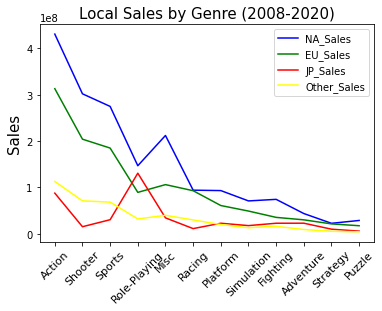

In [79]:
# line plot
for i in locals :
  plt.plot(genre_sales.index, genre_sales[i], label=i, color=colors[i])

plt.title("Local Sales by Genre (2008-2020)", fontsize=15)
plt.xticks(rotation =45, fontsize=11)
plt.ylabel("Sales", fontsize=15)
plt.legend(locals)
plt.show()


>- ÏùºÎ≥∏ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† ÏßÄÏó≠ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÎèÑÍ∞Ä ÎÜíÏùÄ Ïû•Î•¥Ïù¥Îã§.


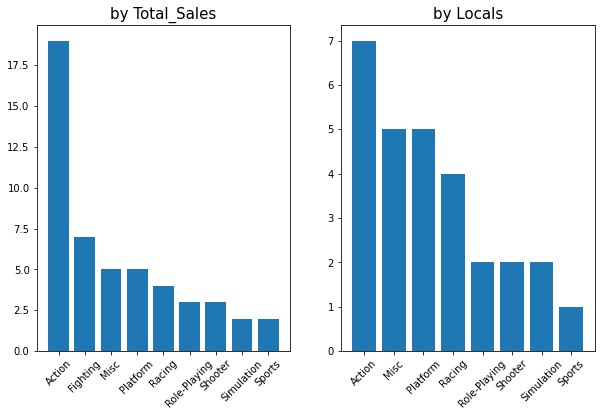

In [76]:
fig, (axs1,axs2) = plt.subplots(1, 2, figsize=(10, 6))

axs1.bar(sales_T_G.index, sales_T_G.sort_values(ascending=False)) 
axs1.set_title("by Total_Sales", fontsize=15)
axs1.tick_params(axis='x', rotation=45)

axs2.bar(sales_A_G.index, sales_A_G.sort_values(ascending=False)) 
axs2.set_title("by Locals", fontsize=15)
axs2.tick_params(axis='x', rotation=45)

>- 'Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑ' Ï§ë Action Ïû•Î•¥Î°ú Ï∂úÏãúÎêú Í≤åÏûÑÏù¥ Í∞ÄÏû• ÎßéÏïòÎã§.

##* Ï∂úÏãú ÏßÄÏó≠ : Î∂ÅÎØ∏ ÏßÄÏó≠


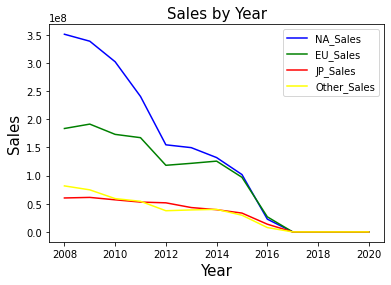

In [ ]:
# Ïó∞ÎèÑÎ≥Ñ Ï∂úÍ≥†Îüâ Î≥ÄÌôî ÏãúÍ∞ÅÌôî
local_years = df_2008.groupby("Year")[locals].sum()

for i in locals : 
  plt.plot(local_years.index, local_years[i], color=colors[i])

plt.title("Sales by Year", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.legend(sales)
plt.show()

>- 2008ÎÖÑÎèÑ Î∂ÄÌÑ∞ ÏµúÍ∑ºÍπåÏßÄ Ï∂úÍ≥†ÎüâÏù¥ Í∞ÄÏû• ÎÜíÎã§. 
>- Ï¶â, ÏãúÏû•Í∑úÎ™®Í∞Ä Í∞ÄÏû• ÌÅ¨Í∏∞ÎïåÎ¨∏Ïù¥Îã§.

##* ÌîåÎû´Ìèº : X360

In [ ]:
# Action Ïû•Î•¥Ïùò Ï∂úÏãú Í≤åÏûÑ count
platform_count = df_2008[(df_2008["Genre"]=="Action")].groupby("Platform").count()
platform_count = platform_count.sort_values(by="Name", ascending=False)["Name"]

# Action Ïû•Î•¥Ïùò Ï∂úÍ≥†Îüâ
platform_T = df_2008[(df_2008["Genre"]=="Action")].groupby("Platform").sum()
platform_T = platform_T.sort_values(by="Total_Sales", ascending=False)["Total_Sales"]

Action_platform = pd.concat([platform_T, platform_count], axis=1)
Action_platform.columns = ["Total_Sales", "Counts"]
Action_platform["Sales/Counts"] = round(Action_platform["Total_Sales"] / Action_platform["Counts"], 0)
Action_platform.sort_values(by="Sales/Counts", ascending=False, inplace=True)
Action_platform

Total_Sales  Counts  Sales/Counts
X360  218470000.0     266      821316.0
PS3   283740000.0     346      820058.0
PS4    84700000.0     121      700000.0
XOne   33780000.0      68      496765.0
Wii    79820000.0     181      440994.0
DS     73940000.0     222      333063.0
PS2    17580000.0      54      325556.0
3DS    56490000.0     180      313833.0
WiiU   19310000.0      63      306508.0
PSP    31890000.0     152      209803.0
PC     23710000.0     131      180992.0
PSV    19990000.0     142      140775.0

>- Action Ïû•Î•¥ÏóêÏÑú Ï∂úÏãúÍ≤åÏûÑ ÏàòÎüâ ÎåÄÎπÑ Ï∂úÍ≥†ÎüâÏù¥ Í∞ÄÏû• ÎÜíÏùÄ ÌîåÎû´ÌèºÏùÄ X360 Ïù¥Îã§.


In [ ]:
# Î∂ÅÎØ∏ ÏßÄÏó≠ ÏÉÅÏúÑ 50 : ÌîåÎû´Ìèº count
sales_NA_50 = df_2008.sort_values(by="NA_Sales", ascending=False)[:50]
sales_NA_50_P = pd.DataFrame({"Counts":sales_NA_50.groupby("Platform")["Name"].count()})
sales_NA_50_P.sort_values(by="Counts", ascending=False, inplace=True)
sales_NA_50_P

Counts
Platform        
X360          21
Wii           12
PS3            8
3DS            4
DS             2
PS4            2
XOne           1

>- Î∂ÅÎØ∏ ÏßÄÏó≠Ïùò Ï∂úÍ≥†Îüâ ÏÉÅÏúÑ Í≤åÏûÑ 50Í∞ú : X360 ÌîåÎû´ÌèºÏù¥ 21Í∞úÎ°ú Í∞ÄÏû• ÎßéÎã§.

In [ ]:
# Î∂ÅÎØ∏ ÏßÄÏó≠ ÏÉÅÏúÑ 50 : Ïû•Î•¥ count, Ï∂úÍ≥†Îüâ
sales_NA_50_G = pd.DataFrame({"Counts":sales_NA_50.groupby("Genre")["Name"].count()})
sales_NA_50_G["NA_Sales"] = sales_NA_50.groupby("Genre")["NA_Sales"].sum()
sales_NA_50_G.sort_values(by="Counts", ascending=False, inplace=True)
sales_NA_50_G["Sales/Counts"] = round(sales_NA_50_G["NA_Sales"] /sales_NA_50_G["Counts"], 0)
sales_NA_50_G

Counts     NA_Sales  Sales/Counts
Genre                                          
Shooter           19  113520000.0     5974737.0
Action             8   43330000.0     5416250.0
Misc               6   40090000.0     6681667.0
Platform           5   30050000.0     6010000.0
Role-Playing       5   21810000.0     4362000.0
Sports             4   32260000.0     8065000.0
Racing             2   20590000.0    10295000.0
Fighting           1    6750000.0     6750000.0

>- Î∂ÅÎØ∏ ÏßÄÏó≠Ïùò Ï∂úÍ≥†Îüâ ÏÉÅÏúÑ Í≤åÏûÑ 50Í∞ú : 
     - Ï∂úÏãú Í≤åÏûÑ ÏàòÎüâÏù¥ Í∞ÄÏû• ÎßéÏùÄ Í≤åÏûÑÏùÄ Shooter Ïû•Î•¥Ïù¥Í≥†,  ActionÏùÄ Îëê Î≤àÏß∏Ïù¥Îã§.
     - Í∑∏Îü¨ÎÇò Í≤åÏûÑ ÏàòÎüâ ÎåÄÎπÑ Ï∂úÍ≥†ÎüâÏùÄ ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄÏïäÎäîÎã§.
     - ÎπÑÏä∑Ìïú Ï∂úÍ≥†ÎüâÏùÑ Í∏∞ÎåÄÌï† Ïàò ÏûàÏúºÎ©¥ÏÑúÎèÑ Í≤ΩÏüÅÏù¥ Îçú ÏπòÏó¥Ìïú Action Ïû•Î•¥Î•º ÏÑ†ÌÉùÌïúÎã§.

#> ÏöîÏïΩ



## Action Ïû•Î•¥Î•º ÏÑ†ÌÉùÌïúÎã§.
- ÏΩòÏÜîÍ≤åÏûÑ Ïú†Ï†ÄÏóêÍ≤å ÎåÄÏ§ëÏÑ±Ïù¥ Í∞ÄÏû• ÎÜíÏùÄ Ïû•Î•¥Ïù¥Îã§.
>- ÏùºÎ≥∏ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† ÏßÄÏó≠ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÎèÑÍ∞Ä ÎÜíÏùÄ Ïû•Î•¥Ïù¥Îã§.
>- Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑÏùÄ Action Ïû•Î•¥ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÎÇòÌÉÄÎÇ¨Îã§.
---
## Î∂ÅÎØ∏ ÏßÄÏó≠ÏùÑ ÏÑ†ÌÉùÌïúÎã§.
- ÏΩòÏÜîÍ≤åÏûÑÏùò ÏãúÏû•Í∑úÎ™®Í∞Ä Í∞ÄÏû• ÌÅ¨Îã§.
>- 2008ÎÖÑÎèÑ Î∂ÄÌÑ∞ ÏµúÍ∑ºÍπåÏßÄ Ï∂úÍ≥†ÎüâÏù¥ Í∞ÄÏû• ÎÜíÎã§.  
---
## ÌîåÎû´ÌèºÏùÄ X360ÏùÑ ÏÑ†ÌÉùÌïúÎã§.
- ActionÏû•Î•¥ÏóêÏÑú Í≤åÏûÑ Îãπ Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ ÌîåÎû´ÌèºÏùÄ X360 Ïù¥Îã§.
>- Action Ïû•Î•¥ÏóêÏÑú Ï¥ù Ï∂úÍ≥†ÎüâÏùÄ PD3 ÌîåÎû´Ìèº Ïù¥ ÎÜíÏßÄÎßå, Ï∂úÏãú Í≤åÏûÑ 1Í∞úÎãπ Ï∂úÍ≥†ÎüâÏùÄ X360 ÌîåÎû´ÌèºÏù¥ ÎÜíÎã§.

- Î∂ÅÎØ∏ ÏßÄÏó≠ÏóêÏÑú Í∞ÄÏû• ÏÑ†Ìò∏ÌïòÎäî ÌîåÎû´ÌèºÏùÄ X360 Ïù¥Îã§.
>- Î∂ÅÎØ∏ ÏßÄÏó≠Ïùò Ï∂úÍ≥†Îüâ ÏÉÅÏúÑ Í≤åÏûÑ 50Í∞ú Ï§ë X360 ÌîåÎû´ÌèºÏù¥ 21Í∞úÎ°ú Í∞ÄÏû• ÎßéÎã§.
>- Î∂ÅÎØ∏ ÏßÄÏó≠Ïùò Ï∂úÍ≥†Îüâ ÏÉÅÏúÑ Í≤åÏûÑ 50Í∞ú Ï§ë Shooter Ïû•Î•¥Í∞Ä 19Í∞ú, Action Ïû•Î•¥Í∞Ä 8Í∞úÏù¥ÏßÄÎßå,
>- Í≤åÏûÑ Ïû•Î•¥ Îãπ Ï∂úÍ≥†ÎüâÏùÄ ShooterÏôÄ ActionÏóêÏÑú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
---

###üèÜ  Îã§Ïùå Î∂ÑÍ∏∞Ïóê Ïñ¥Îñ§ Í≤åÏûÑÏùÑ ÏÑ§Í≥ÑÌï¥Ïïº Ìï†Íπå
## Action Ïû•Î•¥ / Î∂ÅÎØ∏ ÏßÄÏó≠ / X360 ÌîåÎû´Ìèº